In [2]:
from __future__  import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
from IPython.display import clear_output
import tensorflow as tf

In [4]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


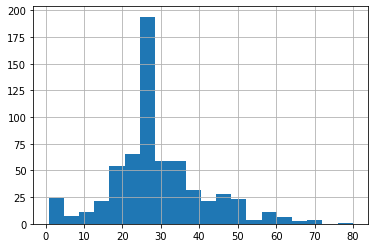

In [5]:
dftrain.age.hist(bins=20)

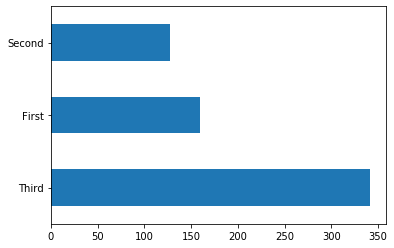

In [6]:
dftrain['class'].value_counts().plot(kind='barh')

In [7]:
dftrain

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [8]:
cat_col = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
num_col = ['age','fare']
fc = []

In [9]:
for feature_name in cat_col:
    vocab = dftrain[feature_name].unique()
    fc.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

for feature_name in num_col:
    fc.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [10]:
fc

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [14]:
dftrain.shape

(627, 9)

In [15]:
# Make a input function and return it!
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices( ( dict(data_df), label_df ) )
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [16]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

<h3>Linear Classifier!</h3>

In [18]:
lin_est = tf.estimator.LinearClassifier(feature_columns=fc)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\XeonAJ\\AppData\\Local\\Temp\\tmpfelpse7l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
lin_est.train(train_input_fn)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

In [20]:
res = lin_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-16T12:21:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XeonAJ\AppData\Local\Temp\tmpfelpse7l\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.40580s
INFO:tensorflow:Finished evaluation at 2020-04-16-12:21:25
INFO:tensorflow:Saving dict for global step 200: a

In [24]:
print(res['accuracy'])
print(res)

0.8197767
{'accuracy': 0.8197767, 'accuracy_baseline': 0.61244017, 'auc': 0.8707776, 'auc_precision_recall': 0.85006475, 'average_loss': 0.42224938, 'label/mean': 0.3875598, 'loss': 0.4206491, 'precision': 0.7901786, 'prediction/mean': 0.39255124, 'recall': 0.72839504, 'global_step': 200}


In [63]:
res1 = lin_est.predict(eval_input_fn)
a_res1 = list(res1)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XeonAJ\AppData\Local\Temp\tmpfelpse7l\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<h1>Classification</h1>

In [2]:
import tensorflow as tf
import pandas as pd

In [3]:
train_path = tf.keras.utils.get_file('iris_training.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
test_path = tf.keras.utils.get_file('iris_test.csv','https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv')

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 1us/step


In [5]:
col_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
species = ['Setosa','Versicolor','Virginica']

In [6]:
train = pd.read_csv(train_path, names=col_names, header=0)
test = pd.read_csv(test_path, names=col_names, header=0)

In [8]:
y_train = train.pop('Species')
y_test = test.pop('Species')

In [18]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        dataset = dataset.shuffle(100).repeat()
    return dataset.batch(batch_size)

In [19]:
fc = []
for k in train.keys():
    fc.append(tf.feature_column.numeric_column(key=k))

In [20]:
fc

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [21]:
cla = tf.estimator.DNNClassifier(feature_columns=fc, hidden_units=[50,30,10], n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\XeonAJ\\AppData\\Local\\Temp\\tmpkn2a1zw9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
cla.train(input_fn=lambda: input_fn(train, y_train, training=True), steps=5000) 
# we actually want to return the fn object into input_fn param! thats why we use lanbda which will return the function

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XeonAJ\AppData\Local\Temp\tmpkn2a1zw9\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\XeonAJ\AppData\Local\Temp\tmpkn2a1zw9\model.ckpt.
INFO:tensorflow:loss = 0.14282541, step = 5000
INFO:tensor

In [26]:
eval_score = cla.evaluate(input_fn=lambda: input_fn(test, y_test, training=False))
print(eval_score['accuracy'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-16T18:39:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XeonAJ\AppData\Local\Temp\tmpkn2a1zw9\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.31319s
INFO:tensorflow:Finished evaluation at 2020-04-16-18:39:27
INFO:tensorflow:Saving dict for global step 1000

In [79]:
print(species)
print(train.head(3))
y_train.head(3)

['Setosa', 'Versicolor', 'Virginica']
   SepalLength  SepalWidth  PetalLength  PetalWidth
0          6.4         2.8          5.6         2.2
1          5.0         2.3          3.3         1.0
2          4.9         2.5          4.5         1.7


0    2
1    1
2    2
Name: Species, dtype: int64

In [80]:
def p_input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predict = {}
for col in col_names[0:4]:
    predict[col] = [float(input(col + ": "))]
pred = list(cla.predict(input_fn=lambda: p_input_fn(predict)))
classid = pred[0]['class_ids'][0]

SepalLength:  5.0
SepalWidth:  2.3
PetalLength:  3.3
PetalWidth:  1.0


In [83]:
print(f"Class {species[classid]} with probablity of {pred[0]['probabilities'][classid]}")

Class Versicolor with probablity of 0.9517735838890076


<h1>Hidden Markow Model</h1>

In [90]:
import tensorflow_probability as tfp
import tensorflow as tf
tfd = tfp.distributions

In [91]:
ini_d = tfd.Categorical(probs=[0.8,0.2])
tra_d = tfd.Categorical(probs=[[0.7,0.3],[0.2,0.8]])
obs_d = tfd.Normal(loc=[0.,15.], scale=[5.,10.])

In [93]:
model = tfd.HiddenMarkovModel(initial_distribution=ini_d,transition_distribution=tra_d,observation_distribution=obs_d,num_steps=7)

In [102]:
(model.mean()).numpy()

array([2.9999998, 5.9999995, 7.4999995, 8.25     , 8.625001 , 8.812501 ,
       8.90625  ], dtype=float32)